In [1]:
"""
Note:

This implementation method of XGBoost univariate forecasting was from:

https://cprosenjit.medium.com/10-time-series-forecasting-methods-we-should-know-291037d2e285

It was another method I used in part to form the final version of XGBoost Univariate forecast
"""

'\nNote:\n\nThis implementation method of XGBoost univariate forecasting was from:\n\nhttps://cprosenjit.medium.com/10-time-series-forecasting-methods-we-should-know-291037d2e285\n\nIt was another method I used in part to form the final version of XGBoost Univariate forecast\n'

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
"""
Function that loads and prepares the dataframe. 

Converts the data into time-series readable.
"""
def initialFormat (filepath, indicatorcode):
    #Reds the file and creates a dataframe from it
    df = pd.read_excel(filepath)
    
    #Choose what to forecast using indicator code
    df_icode = df.loc[df['Indicator Code'] == indicatorcode]
    
    #Dropping these columns as they are not needed for the forecast
    df_icode = df_icode.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
    
    #Swap axis so it is in the proper format
    df_formatted = df_icode.swapaxes("index", "columns")
    
    #Renaming column name to 'values' to make reference easier
    for col_names in df_formatted.columns:
        name = df_formatted.rename(columns={col_names : "Val"})
        return name
    
    return df_formatted

In [4]:
def performance_metrics(y_test, y_pred):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test )) *100
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean = np.mean(y_test)
    
    print("RMSE: ", rmse)
    print("MAPE: ", mape)
    print("MAE: ", mae)
    print("R2 Score: ", r2)
    print("Mean of actual: ", mean)

In [5]:
data = initialFormat('/Users/farhanhabibie/Desktop/Farhan Thesis Code /UG-Project-Farhan/Indonesia Macro Dataset.xlsx',
             'NY.GDP.DEFL.KD.ZG')

In [8]:
#Restructure data with shift
data["Target"] = data.Val.shift(-1)

In [9]:
data.dropna(inplace=True)

In [11]:
#Extract feature & label
X = data.iloc[:,0:1].values

In [12]:
X

array([[ 13.93601551],
       [178.86674035],
       [145.84108627],
       [114.73115931],
       [228.81894076],
       [-98.70383134],
       [164.72184066],
       [122.97280649],
       [ 21.35320193],
       [ 14.25307188],
       [  2.72473711],
       [ 16.11983903],
       [ 36.87847951],
       [ 47.31049663],
       [ 12.46805837],
       [ 14.4567946 ],
       [ 13.01236266],
       [ 12.06489856],
       [ 31.18718861],
       [ 29.14549977],
       [ 10.15071465],
       [  7.9505039 ],
       [ 18.61270035],
       [ 10.42182968],
       [  6.19136369],
       [  2.25377148],
       [ 16.00381571],
       [  7.62910933],
       [  9.48502964],
       [  9.0939497 ],
       [  8.76703889],
       [  7.28885626],
       [ 19.15257826],
       [  7.7765728 ],
       [  9.88204513],
       [  8.67650976],
       [ 12.5713763 ],
       [ 75.27116877],
       [ 14.16119599],
       [ 20.44745685],
       [ 14.29571544],
       [  5.89605169],
       [  5.48742914],
       [  8

In [14]:
y = data.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)

In [22]:
model = XGBRegressor(objective = 'reg:squarederror', n_estimators=1000)

In [23]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
y_pred = model.predict(X_test)

In [25]:
df_pred = pd.DataFrame({'Predicted' : y_pred})

In [26]:
result = pd.concat([dataFormatted.tail(len(X_test)).reset_index(drop=True), df_pred], axis = 1)

In [27]:
result

,year,Val,Target,Predicted
0,2007,11.258579,18.149751,11.259875
1,2008,18.149751,8.274752,11.259875
2,2009,8.274752,15.264294,11.259875
3,2010,15.264294,7.465943,11.259875
4,2011,7.465943,3.753879,11.259875
5,2012,3.753879,4.965990,11.259875
6,2013,4.965990,5.443175,11.259875
7,2014,5.443175,3.980243,11.259875
8,2015,3.980243,2.438924,11.259875
9,2016,2.438924,4.292678,11.259875


RMSE:  6.736238253402367
MAPE:  174.00400840094443
MAE:  6.454432242430241
R2 Score:  -0.9018608177690968
Mean of actual:  6.6211587737860995


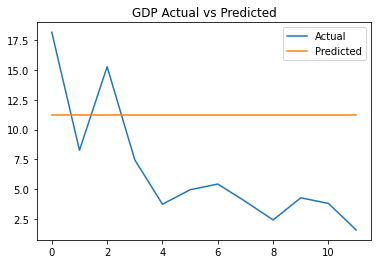

In [28]:
df_compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_compare.plot(title='GDP Actual vs Predicted')
performance_metrics(y_test, y_pred)